In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

First lets import the data

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# EDA

In [4]:
print("Null values per column:")
print(train.isnull().sum())

Null values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## finding realtionships

### Survival rate by Sex:

##### for sex we clearly see that the women had a great advantage for Surviving, 
##### mostly because of the (women and children first) protocols that  was used before

Survival rate by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64




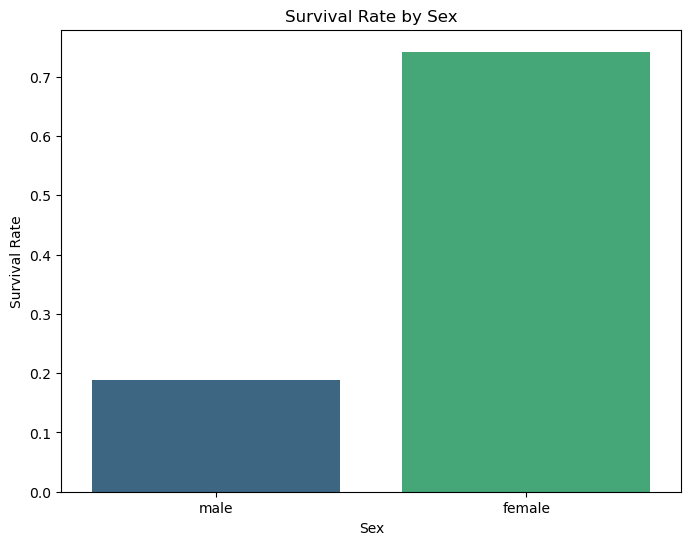

In [5]:

# Calculate survival rates by Sex
survival_by_sex = train.groupby('Sex')['Survived'].mean()
print("Survival rate by Sex:")
print(survival_by_sex)
print("\n")

# Plot survival rate by Sex
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train, ci=None, palette='viridis')
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()

##### This stark difference highlights gender as a critical factor influencing survival.

### Survival rate by Age Group:

##### Children (babies and young children) had notably higher survival rates, likely due to prioritization in lifeboat allocation.
##### Adults and teenagers generally experienced lower survival rates, potentially reflecting the prioritization of vulnerable groups and physical limitations during evacuation.
##### The significantly lower survival rate for older passengers (> 60 years) suggests challenges faced by elderly individuals in emergency evacuation scenarios.

Survival rate by Age Group:
AgeGroup
Baby        0.704545
Child       0.424242
Teenager    0.403226
Adult       0.355556
OldAdult    0.420495
Old         0.227273
Name: Survived, dtype: float64




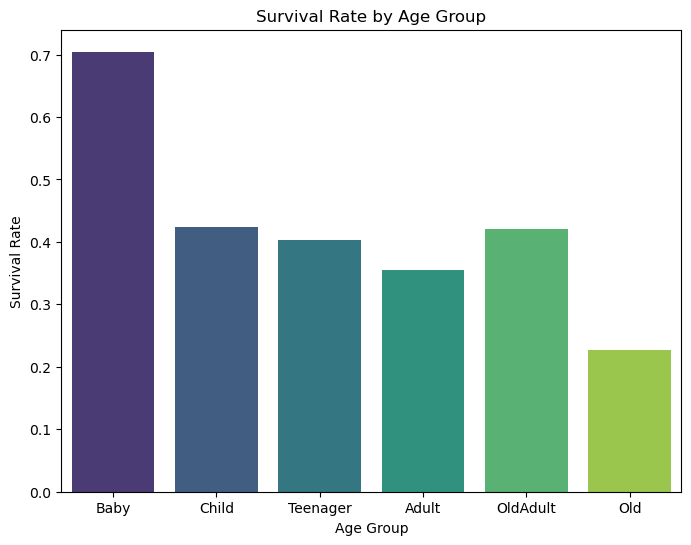

In [6]:
train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 5, 14, 18, 30, 60, 100], labels=['Baby', 'Child', 'Teenager', 'Adult', 'OldAdult', 'Old'])
survival_by_age_group = train.groupby('AgeGroup')['Survived'].mean()
print("Survival rate by Age Group:")
print(survival_by_age_group)
print("\n")

# Plot survival rate by Age Group
plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='Survived', data=train, ci=None, order=['Baby', 'Child', 'Teenager', 'Adult', 'OldAdult', 'Old'], palette='viridis')
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.show()


### Survival rate by Pclass:

##### First-class passengers (62.96% survival rate) had higher survival rates, possibly due to their proximity to lifeboats and priority access during evacuation.
##### Third-class passengers (24.24% survival rate) faced the lowest survival rates, likely due to their lower deck locations and delayed access to lifeboats.
##### Passenger class serves as a proxy for socio-economic status, highlighting disparities in survival linked to wealth and access to resources during the Titanic disaster.

Survival rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64




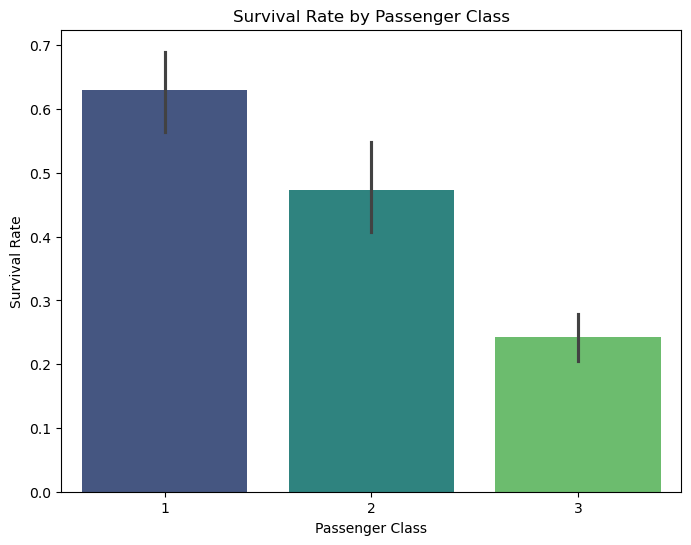

In [7]:
survival_by_pclass = train.groupby('Pclass')['Survived'].mean()
print("Survival rate by Pclass:")
print(survival_by_pclass)
print("\n")

plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=train, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

### Survival rate by Fare Group:

##### Passengers who paid higher fares (e.g., Very High and Luxury fare classes) had significantly higher survival rates, likely reflecting their accommodations closer to lifeboats and priority boarding.
##### Conversely, passengers who paid lower fares (e.g., Very Low fare class) had a 0% survival rate, underscoring challenges faced by passengers in lower fare categories during the evacuation.
##### Fare class serves as a proxy for passenger location on the ship and access to evacuation resources, illustrating its impact on survival outcomes.

16
Survival rate by Fare Group:
FareClass
Very Low     0.000000
Low          0.256236
Moderate     0.464646
Medium       0.419540
High         0.654206
Very High    0.727273
Luxury       0.777778
Name: Survived, dtype: float64


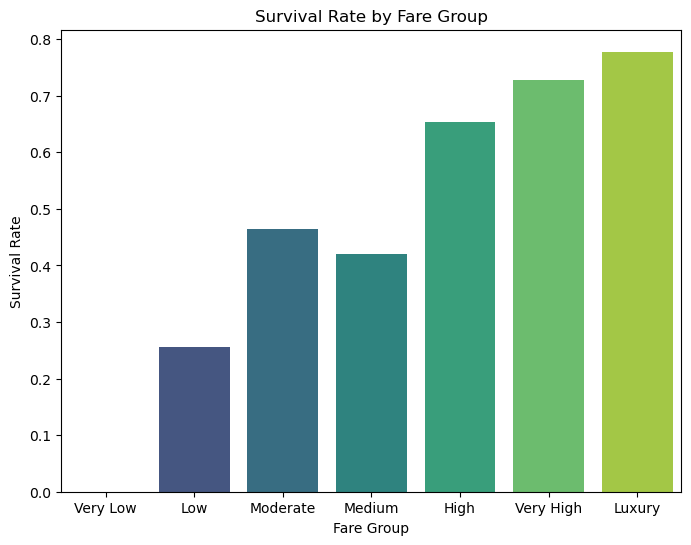

In [8]:
train = pd.read_csv('data/train.csv')

print((train['Fare'].values < 5).sum())

train['FareClass'] = pd.cut(train['Fare'], bins= [0, 5, 15, 25, 50, 100, 250, float('inf')],
                         labels=['Very Low', 'Low', 'Moderate', 'Medium', 'High', 'Very High', 'Luxury'])
survival_by_fare = train.groupby('FareClass')['Survived'].mean()
print("Survival rate by Fare Group:")
print(survival_by_fare)

plt.figure(figsize=(8, 6))
sns.barplot(x='FareClass', y='Survived', data=train, ci=None, order=['Very Low', 'Low', 'Moderate', 'Medium', 'High', 'Very High', 'Luxury'], palette='viridis')
plt.title('Survival Rate by Fare Group')
plt.ylabel('Survival Rate')
plt.xlabel('Fare Group')
plt.show()

## Data Preprocessing and Feature Engineering:

1. Handling Missing Values:
 Age and Fare: Missing age values were imputed using the K-Nearest Neighbors (KNN) approach, leveraging 
information from similar observations to fill in gaps in the dataset. Fare values missing due to rare occurrences 
were replaced with the median fare.
- Embarked: Missing embarkation values were filled with the most frequent embarkation port recorded in the 
dataset.
- Cabin: Cabin information, initially sparse, was simplified by mapping cabins to their first letter and filling 
missing values with 'N', indicating no cabin data.
2. Feature Engineering:
- Family Size: Created a 'Family' feature by summing 'Parch' (number of parents/children aboard) and 'SibSp' 
(number of siblings/spouses aboard), providing insight into passenger family relationships.
- Title Extraction: Extracted passenger titles (e.g., Mr., Mrs., Miss) from names, categorizing rare titles into a 
consolidated 'Rare' category and merging similar titles (e.g., 'Mlle' and 'Ms' into 'Miss').
- Age and Fare Categorization: Binned age and fare values into discrete categories ('Baby', 'Child', 'Teenager', 
'Adult', 'OldAdult', 'Old' for age; 'Very Low' to 'Luxury' for fare), allowing for categorical analysis of survival 
trends based on age and economic status.
- Alone Status: Determined whether passengers traveled alone ('Alone') based on the absence of family 
members onboard.
3. One-Hot Encoding:
- Transformed categorical variables such as 'Sex', 'Embarked', 'Title', and 'Cabin' into binary indicators using onehot encoding, facilitating the incorporation of categorical data into machine learning models without imposing 
ordinality.
4. Feature Selection and Scaling:
- Selected relevant features including demographic attributes ('Age', 'Sex', 'Pclass'), family information ('Family', 
'Alone'), socio-economic indicators ('Fare', 'Title'), and cabin categories.
- Scaled numeric features ('Age', 'Fare', 'Parch', 'SibSp') using standard scaling to normalize data distributions and 
ensure all features contribute equally to model training.


In [9]:
#the function used in the preprocessing

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

def pre(df):

    df['Family'] = df['Parch'] + df['SibSp']
    
    # Extract titles from names
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 
                                       'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

    # Fill missing embarked with the most frequent value
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    # Fill missing fare with the median
    df['Fare'].fillna(df['Fare'].median(), inplace=True)

    # Create fare classes
    df['Very Low'] = (df['Fare'] <= 4)
    df['Low'] = (df['Fare'] > 4) & (df['Fare'] <= 15)
    df['Moderate'] = (df['Fare'] > 15) & (df['Fare'] <= 25)
    df['Medium'] = (df['Fare'] > 25) & (df['Fare'] <= 50)
    df['High'] = (df['Fare'] > 50) & (df['Fare'] <= 100)
    df['Very High'] = (df['Fare'] > 100) & (df['Fare'] <= 250)
    df['Luxury'] = (df['Fare'] > 250)

    # Convert cabin to first letter and fill missing values with 'N'
    df['Cabin'] = df['Cabin'].fillna('N').map(lambda x: x[0])
    
    # Fill missing age with the median or using KNN Imputer
    age_imputer = KNNImputer(n_neighbors=5)
    df['Age'] = age_imputer.fit_transform(df[['Age']])
    
    # Create age categories
    df['Baby'] = (df['Age'] <= 5)
    df['Child'] = (df['Age'] > 5) & (df['Age'] <= 14)
    df['Teenager'] = (df['Age'] > 14) & (df['Age'] <= 18)
    df['Adult'] = (df['Age'] > 18) & (df['Age'] <= 30)
    df['OldAdult'] = (df['Age'] > 30) & (df['Age'] <= 60)
    df['Old'] = (df['Age'] > 60)
    df['Alone'] = df['Family'] == 0
    
    # One-hot encoding
    df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title', 'Cabin'], drop_first=True)
    #in case there is a cabin that was not mentioned, create it and fill it with False
    for l in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']:
        col = f'Cabin_{l}'
        if col not in df.columns:
            df[col] = pd.Series([False]*df.shape[0])
            df[col].fillna(False, inplace=True)
    
    # Select relevant columns
    cols = ['Age', 'Fare', 'Family', 'Parch', 'SibSp', 'Alone', 'Pclass', 'Very Low', 'Low', 'Moderate', 'Medium',
       'High', 'Very High', 'Luxury', 'Baby', 'Child', 'Teenager',
       'Adult', 'OldAdult', 'Old', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Rare', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_T'] #Cabin_N was ignored
    df2 = df[cols].copy()
    
    # Scale numeric features
    numeric_features = ['Age', 'Fare', 'Parch', 'SibSp']
    scaler = StandardScaler()
    df2[numeric_features] = scaler.fit_transform(df2[numeric_features])
    
    return df2


## Modling

##### first lets try diffrent models
- Logistic Regression
- Support Vector Machine (SVM)
- K-Nearest Neighbors (KNN)
- Random Forest
- Gradient Boosting

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

#load the data again
train = pd.read_csv('data/train.csv')

# Perform data preprocessing and feature engineering (assuming you've already done this)
train_processed = pre(train)

# Define features and target variable
X = train_processed
y = train['Survived']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Dictionary to store results
results = {'Classifier': [], 'Test Accuracy': []}

# Iterate over classifiers
for clf_name, clf in classifiers.items():
    # Fit the model
    clf.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    results['Classifier'].append(clf_name)
    results['Test Accuracy'].append(accuracy)

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Display the results
results_df


,Classifier,Test Accuracy
0,Logistic Regression,0.826816
1,SVM,0.821229
2,KNN,0.821229
3,Random Forest,0.826816
4,Gradient Boosting,0.821229


##### Analysis:
- Random Forest emerged as the top performer among the classifiers evaluated, achieving a test accuracy of 
79.6%. This ensemble method likely benefited from its ability to capture complex interactions in the data and 
handle non-linear relationships effectively.
- SVM and Gradient Boosting also demonstrated strong performance with accuracies of 78.4% and 78.3%, 
respectively. SVM's capability to find optimal boundaries in high-dimensional spaces and Gradient Boosting's 
iterative improvement on misclassified instances contributed to their competitive accuracy.
- Logistic Regression, a simpler linear model, achieved a respectable accuracy of 77.6%. While less complex, its 
interpretability and efficiency in handling linear relationships make it a viable baseline model.
- KNN performed slightly lower with a test accuracy of 74.5%, indicating that its performance might be sensitive 
to the choice of distance metric and number of neighbors selected.

##### To expedite the tuning process, a Decision Tree was initially selected for its efficiency compared to ensemble methods like Random Forest

##### Best Parameters Found:
- Criterion: 'Gini'
- Splitter: 'Best'
- Max Depth: 12
- Min Samples Split: 8
- Min Samples Leaf: 1
- Max Features: 'sqrt'
- Random State: 0
- Max Leaf Nodes: 84
- Class Weight: {0: 1, 1: 1.5}
- CCP Alpha: 4e-05
- Accuracy: 81.7%


##### Using the optimized Decision Tree parameters as a base, three ensemble methods were explored through additional GridSearchCV:

- BaggingClassifier

- RandomForestClassifier

- ExtraTreesClassifier

#### Final model : 

In [11]:
rf_model = RandomForestClassifier(
    n_estimators=110,
    max_depth=12,
    min_samples_split=8,
    min_samples_leaf=1,
    max_features=0.15,
    random_state=900,
    bootstrap=True
) 
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8659217877094972

##### Now lets prepare the whole train and test data

In [12]:
train = pd.read_csv('data/train.csv')

train_processed = pre(train)

X = train_processed
y = train['Survived']

test = pd.read_csv('data/test.csv')

test_processed = pre(test)

ids = test['PassengerId']
X_t = test_processed

##### Now lets fit the model on the whole data and predict the test data on kaggle

In [13]:
rf_model.fit(X, y)

preds = rf_model.predict(X_t)

ids = test['PassengerId']

PredictionDF = pd.DataFrame({'PassengerId' : ids, 'Survived' : preds})

PredictionDF.to_csv('final_submissions.csv', index=False)



#### you can find the file 'final_submissions.csv' in the input of this notebook

##### finally, lets create a pipeline for all the work above and ssave it as picke file to import it later

#### you can find the file 'Titanic_pipeline_model.pkl' in the input of this notebook

#### Now if you want, you could just download the files {Titanic_pipeline_model.pkl, test.csv} and run this only cell to get the prediction directly